In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False

import logging
logger = logging.getLogger()

20 van Emde Boas Trees
============
data structures that support the operation of a prioprity queue:

1. base its decisions on comparing keys, sorting bound $\Omega(n \lg n)$ $\to$ at least one important opeartion took $O(\lg n)$ time.

2. exploit additional information (like counting sort): $k \in [0,1,\dotsc,n-1]$, with no duplicates allowed. $\to$ van Emde Boas trees $O(\lg \lg n)$.

To avoid any further confusion, define:     
$n$ - the number of elements currently in the set;    
$u$ - **universe size**, namely, the size of **universe** $\{0,1,2,\dotsc,u-1\}$. 

We assumen throughout that $u$ is an exact power of 2, i.e., $u = 2^k$.

### 20.1 Preliminary approaches
examine various approaches for sorting a dynamic set.

#### Direct addressing
We maintain an array $A[0\dotso u-1]$. The entry $A[x]$ holds a 1 if the value $x$ is in the dynamic set, and it holds a 0 otherwise.

INSERT, DELETE, MEMBER: $O(1)$      
MINIMUM, MAXIMUM, SUCCESSOR, PREDECESSOR: $O(u)$


#### Superimposing a binary tree structure
We can short-cut long scans in the bit vector by superimposing a binary tree of bits on top of it. The bit stored in an internal node is the **logical-or** of its two children.

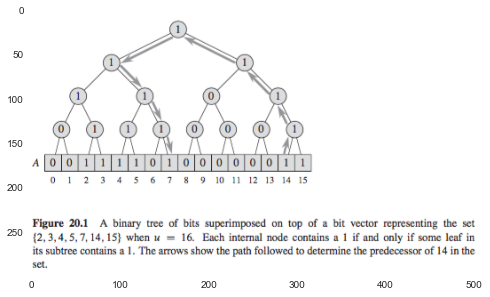

In [3]:
plt.imshow(plt.imread('./res/fig20_1.png'))

INSERT, DELETE, MEMBER: $O(1)$      
MINIMUM, MAXIMUM, SUCCESSOR, PREDECESSOR: $O(\lg u)$

This approach is only marginally better than just using a red-black tree.       
The MEMBER is $O(1)$, whereas a red-black needs $O(\lg n)$.     
If $n$ is much smaller than $u$, a red-black tree would be faster for all the other operations.

#### Superimposing a tree of constant height
We superimpose a tree of degree $\sqrt{u}$, the height of the resulting tree is always 2.

Each internal node stores the logical-or of the bits within its subtree

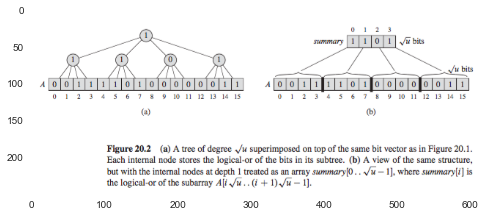

In [4]:
plt.imshow(plt.imread('./res/fig20_2.png'))

INSERT, DELETE, MEMBER: $O(1)$      
MINIMUM, MAXIMUM, SUCCESSOR, PREDECESSOR: $O(\sqrt{u})$

Using a tree of degree $\sqrt{u}$ will turn out to be a key idea of van Emde Boas trees.

In [5]:
# Exercises

### 20.2 A recursive structure
idea: $T(u) = T(\sqrt{u}) + O(1) \to T(u) = O(\lg \lg u)$

We assume $u = 2^{2^k}$, and make the structure in Fig.20.2 recursive, shrinking the universize size by the square root at each level of recursion.

define:     
\begin{align}
    high(x) &= \lfloor x / \sqrt{u} \rfloor \\
    low(x) &\equiv x \mod \sqrt{u} \\
    index(h, l) &= h \sqrt{u} + l \\
\end{align}

#### 20.2.1 Proto van Emde Boas structures
+ if $u = 2$, then it is the base size, and it contains an array $A[0\dotso1]$ of two bits.

+ Otherwise, $u = 2^{2^k}$. Its structure is illustrated in Fig.20.3:

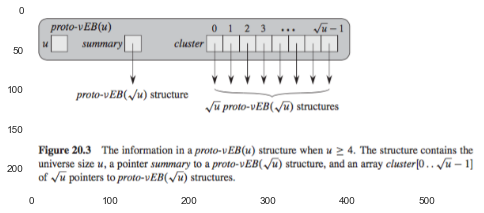

In [2]:
plt.imshow(plt.imread('./res/fig20_3.png'))

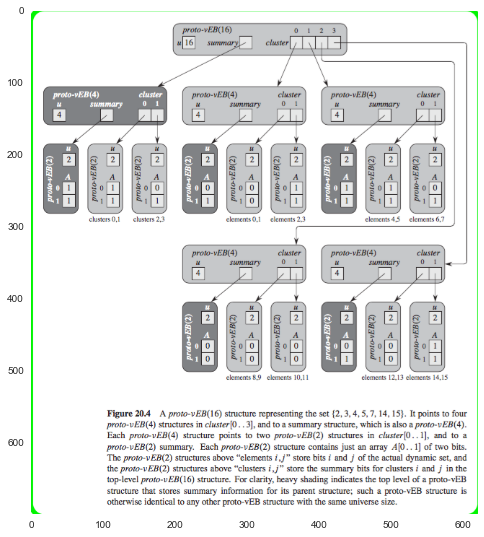

In [3]:
plt.figure(figsize=(8,12))
plt.imshow(plt.imread('./res/fig20_4.png'))

#### 20.2.2 Operations on a proto van Embe Boas structure

##### Determining whether a value is in the set
$O(\lg \lg u)$

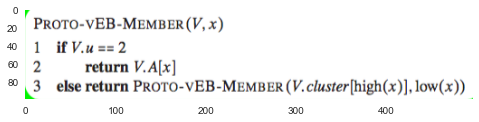

In [4]:
plt.imshow(plt.imread('./res/member.png'))

##### Finding the minimum element
$O(\lg u)$

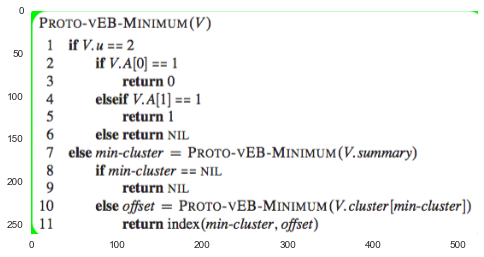

In [5]:
plt.imshow(plt.imread('./res/find_min.png'))

##### Finding the successor
$O(\lg u \lg \lg u)$

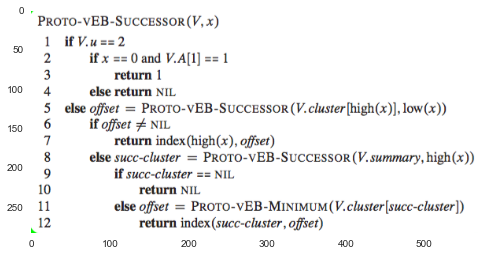

In [8]:
plt.imshow(plt.imread('./res/find_successor.png'))

##### Inserting an element
$O(\lg u)$

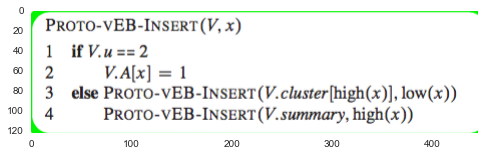

In [9]:
plt.imshow(plt.imread('./res/insert.png'))

##### Deleting an element

In [10]:
#Exercises

### 20.3 The van Emde Boas tree
The proto-vEB structure of the previous section falls short because we have to recurse too many times in most of the operations.      
$\to$ stores a little more information to removing the need for some of the recursion.

We will allow the universe size $u$ to be any exact power of 2, and when $\sqrt{u}$ is not an integer, we will divide the $\lg u$ bits into $\lceil (\lg u) / 2 \rceil$ and $\lfloor (\lg u) / 2 \rfloor$.

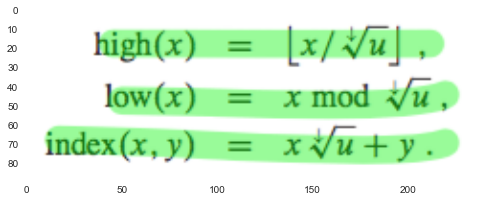

In [3]:
plt.imshow(plt.imread('./res/func.png'))

#### 20.3.1 van Emde Boas trees
a vEB tree contains two attributes not found in a proto-vEB structure:

+ min: stores the minimum element in the vEB tree.       
  the element stored in min does not appear in any of the recursive vEB trees that the cluster array points to.
  
+ max: stores the maximum element in the vEB tree.

These attributes will help us in four ways:

1. The MINIMUM and MAXIMUM operations do not even need to recurse.

2. The SUCCESSOR operation can avoid making a recursive call to determine whether the successor of a value $x$ lies within high(x).

3. We can tell whether a vEB tree has no elements, exactly one element, or at least two elements in constant time from its min and max values.

4. INSERT and DELETE can be operated in constant time if the number of its elements is known.

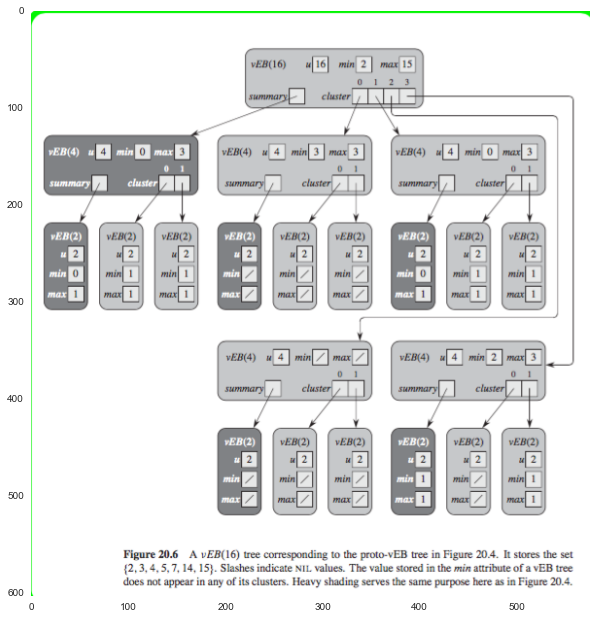

In [5]:
plt.figure(figsize=(10,15))
plt.imshow(plt.imread('./res/fig20_6.png'))

#### 20.3.2 Operations on a van Emde Boas tree
##### Finding the minimum and maximum elements
$O(1)$

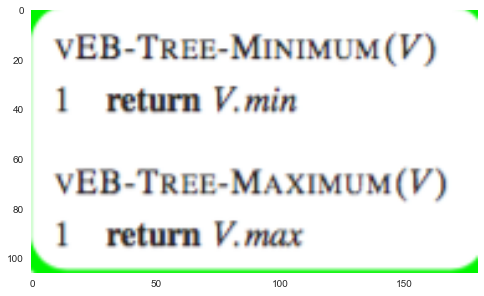

In [7]:
plt.imshow(plt.imread('./res/veb_find_min.png'))

##### Determining whether a value is in the set
$O(\lg \lg u)$

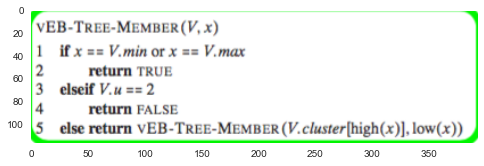

In [8]:
plt.imshow(plt.imread('./res/veb_mem.png'))

##### Finding the successor and predecessor
$O(\lg \lg u)$

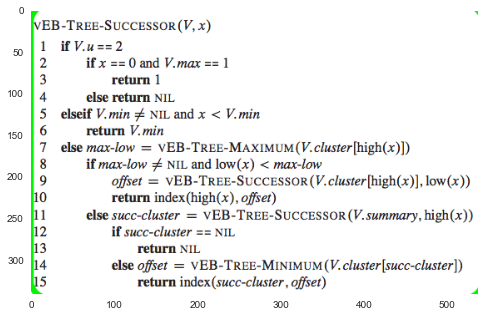

In [10]:
plt.imshow(plt.imread('./res/veb_suc.png'))

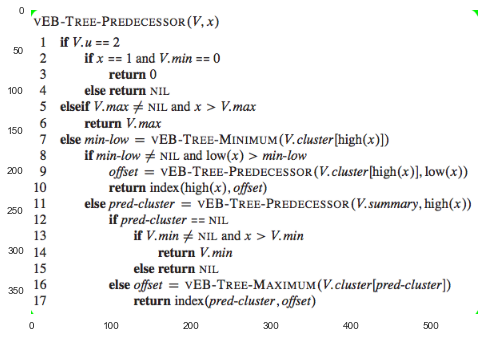

In [11]:
plt.imshow(plt.imread('./res/veb_pre.png'))

##### Inserting an element
$O(\lg \lg u)$

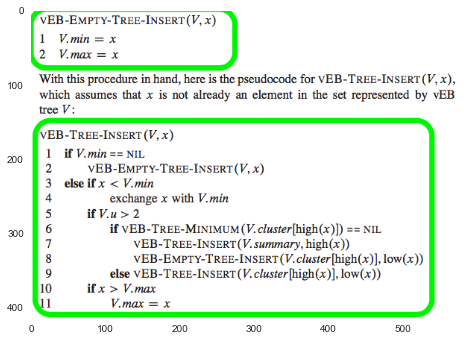

In [12]:
plt.imshow(plt.imread('./res/veb_ins.png'))

##### Deleting an element
$O(\lg \lg u)$

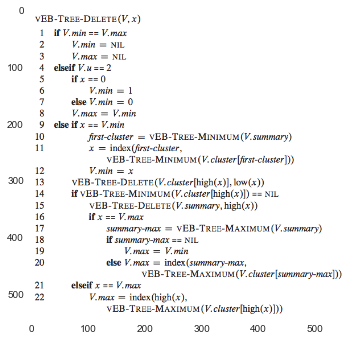

In [13]:
plt.imshow(plt.imread('./res/veb_del.png'))

In [14]:
#Exercise